In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
# Start with Einstein Telescope (ET)

In [3]:
et_curve=np.genfromtxt("ET-0000A-18_ETDSensitivityCurveTxtFile.txt", 
                       names=('freq', 'ET-D-HF', 'ET-D-LF', 'Sum'))

In [4]:
et_curve = Table(et_curve)

In [5]:
# Adding Cosmic Explorer (CE)

In [6]:
ce_curve = np.genfromtxt("ce_wb.dat", names=('freq','CE'))

In [7]:
ce_curve = Table(ce_curve)

In [8]:
time2y = 2*3.154e+7 #scaling for observation time #aLIGO assumes 2 years of data

In [9]:
time5y = 5*3.154e+7

In [10]:
time17y = 17*3.154e+7

In [11]:
time1w = 604800 # seconds in a week

In [12]:
# Since LISA and other telescopes will be operating in the mid 2030s, we extend the PTA baseline to 2036 (17 yrs).
# 2036 corresponds to 2 years of LISA data taking, and so is a resonable comparison.

In [13]:
def improvement(timespan, fmax, fmin):
    """
    Timespan in years, frequency in hertz
    """
    deltaF = abs(fmax-fmin)
    ans = np.sqrt(timespan*deltaF)
    return ans

def Sn2OmGW(freq, s_of_n):
    """
    Set h=0.68 and use H_0=68 km/s/Mpc
    
    1 pc = 1.029e+8 light seconds
    """
    pc2sec = 1.029e+8
    metre2sec = 3.3356e-9
    H0_secs = 68*1000*metre2sec/(1e6*pc2sec)
    num = 2*np.pi**2*freq**3*s_of_n**2 # quantity in files is really sqrt(S_n(f))
    deno = 3*H0_secs**2
    OmegaGW = 5*num/deno # factor of 5 for LIGO, LISA, ET, and CE. PTAs don't sue S_n(f)
    return OmegaGW

def Sn2OmGW_wT(freq, s_of_n, time, dFreq):
    """
    Set H_0=68 km/s/Mpc
    1 pc = 1.029e+8 light seconds
    int_t_improv: integration time improves the detector sensitivity by sqrt(time*dfreq)
    input time in seconds
    """
    pc2sec = 1.029e+8
    metre2sec = 3.3356e-9
    H0_secs = 68*1000*metre2sec/(1e6*pc2sec) # H_0 = 68km/s/Mpc
    num = 2*np.pi**2*freq**3*s_of_n**2 # quantity in files is really sqrt(S_n(f))
    deno = 3*H0_secs**2
    int_t_improv = np.sqrt(time*dFreq)
    OmegaGW = 5*num/deno/int_t_improv # factor of 5 for LIGO, LISA, ET, and CE. PTAs don't sue S_n(f)
    return OmegaGW


### Exmaple of improvement factor for PTAs which will be functioning in 2036

In [14]:
improvement(time17y, 1/(2*time1w), 1/(time17y)) 

21.03022830702279

In [15]:
ce_w5yrs = Sn2OmGW_wT(ce_curve['freq'], ce_curve['CE'], time5y, 100)

In [16]:
ce_w2yrs = Sn2OmGW_wT(ce_curve['freq'], ce_curve['CE'], time2y, 100)

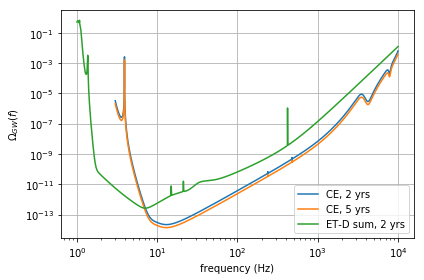

In [17]:
# Compare ET and CE
plt.loglog(ce_curve['freq'], ce_w2yrs, label="CE, 2 yrs")
plt.loglog(ce_curve['freq'], ce_w5yrs, label="CE, 5 yrs")
plt.loglog(et_curve['freq'], Sn2OmGW_wT(et_curve['freq'], et_curve['Sum'], time2y,100)*5, label="ET-D sum, 2 yrs")
plt.grid(True)
plt.ylabel("$\Omega_{GW}(f)$")
plt.xlabel("frequency (Hz)")
plt.legend()
plt.tight_layout()
#plt.savefig("ET_om_gw_2yr_integration.pdf")
plt.show()

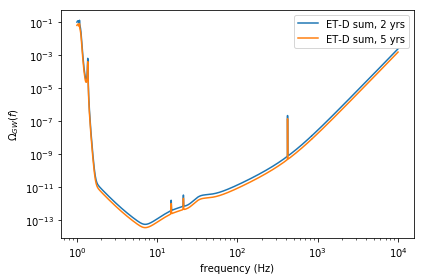

In [18]:
#plt.loglog(et_curve['freq'], Sn2OmGW(et_curve['freq'], et_curve['ETDHF']), label="ET-D HF", linestyle="--")
#plt.loglog(et_curve['freq'], Sn2OmGW(et_curve['freq'], et_curve['ETDLF']), label="ET-D LF", linestyle = '-.')
#plt.loglog(et_curve['freq'], Sn2OmGW(et_curve['freq'], et_curve['Sum']), label="ET-D sum")

#plt.loglog(et_curve['freq'], Sn2OmGW_wT(et_curve['freq'], et_curve['ETDHF'], time), label="ET-D HF", linestyle="--")
#plt.loglog(et_curve['freq'], Sn2OmGW_wT(et_curve['freq'], et_curve['ETDLF'], time), label="ET-D LF", linestyle = '-.')
plt.loglog(et_curve['freq'], Sn2OmGW_wT(et_curve['freq'], et_curve['Sum'], time2y, 100), label="ET-D sum, 2 yrs")
plt.loglog(et_curve['freq'], Sn2OmGW_wT(et_curve['freq'], et_curve['Sum'], time5y, 100), label="ET-D sum, 5 yrs")



#plt.grid(True)
plt.ylabel("$\Omega_{GW}(f)$")
plt.xlabel("frequency (Hz)")
plt.legend()
plt.tight_layout()
#plt.savefig("ET_om_gw_2yr_integration.pdf")
plt.show()

In [19]:
# Adding NANOGrav 11 yr data

In [20]:
nano_curve = np.genfromtxt("nanograv18_omega.txt", names=('nanoFreq', 'NANOGrav18'))

In [21]:
nano_curve = Table(nano_curve)

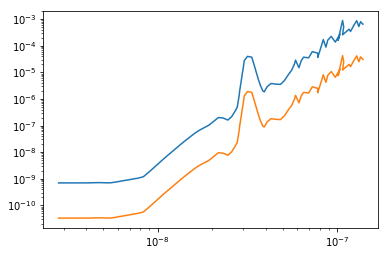

In [23]:
plt.loglog(nano_curve['nanoFreq'], nano_curve['NANOGrav18'], label="NANOGrav 2018")
plt.loglog(nano_curve['nanoFreq'], nano_curve['NANOGrav18']/improvement(time17y, 1/(2*time1w), 1/(time17y)) , label="NANOGrav 2036")

In [24]:
# Add Advanced LIGO at Design Sensitivity

In [25]:
aligo_dat = np.genfromtxt("aLIGO_design.dat", delimiter='', skip_header=1, names=("freq", "omega"))

In [26]:
aligo_dat = Table(aligo_dat)

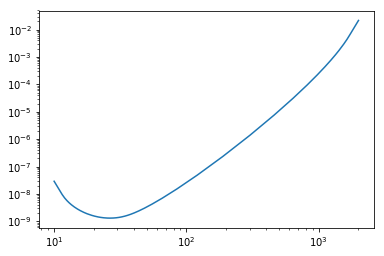

In [27]:
plt.loglog(aligo_dat['freq'], aligo_dat['omega'])

In [28]:
# Add LISA

In [29]:
lisa_dat = np.genfromtxt("PICurve_LISA.dat", delimiter='', skip_header=1, names=("freq", "omega"))

In [30]:
lisa_dat = Table(lisa_dat)

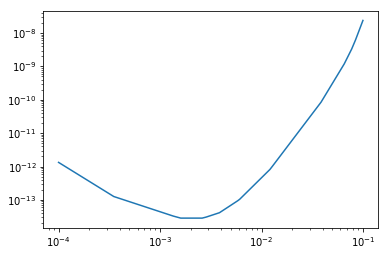

In [31]:
plt.loglog(lisa_dat['freq'], lisa_dat['omega'])

In [32]:
#nanoOmega11 = 3.4e-10/(.68)**2 #NG limit was in h=1, need to divide by h=.68^2
#freq_yr = 1/3.154e+7
n = 150 # remove the first n points for ET & CE so that the high frequency cutoff does not dominate the figure

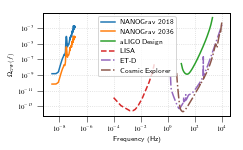

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.loglog(nano_curve['nanoFreq'], nano_curve['NANOGrav18']/(.68)**2, label="NANOGrav 2018")
plt.loglog(nano_curve['nanoFreq'], nano_curve['NANOGrav18']/(.68)**2/improvement(time17y, 1/(2*time1w), 1/(time17y)) , label="NANOGrav 2036")
#plt.hlines(nano_curve['nanoFreq'], 1.0/17/365.25/86400.0, nano_curve['nanoFreq'][0], color='C1')

plt.loglog(aligo_dat['freq'], aligo_dat['omega'], label= "aLIGO Design")
plt.loglog(lisa_dat['freq'], lisa_dat['omega'], label= "LISA", ls = 'dashed')
plt.loglog(et_curve['freq'][n:], Sn2OmGW_wT(et_curve['freq'][n:], et_curve['Sum'][n:], time2y, 100), label="ET-D", ls = '-.')
plt.loglog(ce_curve['freq'][n:], Sn2OmGW_wT(ce_curve['freq'][n:], ce_curve['CE'][n:], time2y, 100), label="Cosmic Explorer", ls = '-.')


#plt.annotate('NG11',(freq_yr, nanoOmega11))
ax.grid(which='major', axis='both', alpha=0.5, linestyle=":")

plt.ylabel("$\Omega_{GW}(f)$")
plt.xlabel("Frequency (Hz)")
plt.legend(loc=9)
plt.tight_layout()
#plt.savefig("all_exper_w2yrs_NEW.pdf")
plt.show()

In [39]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)
